In [1]:
%matplotlib inline
# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'
%config IPCompleter.greedy=True
import pymagnet as pm

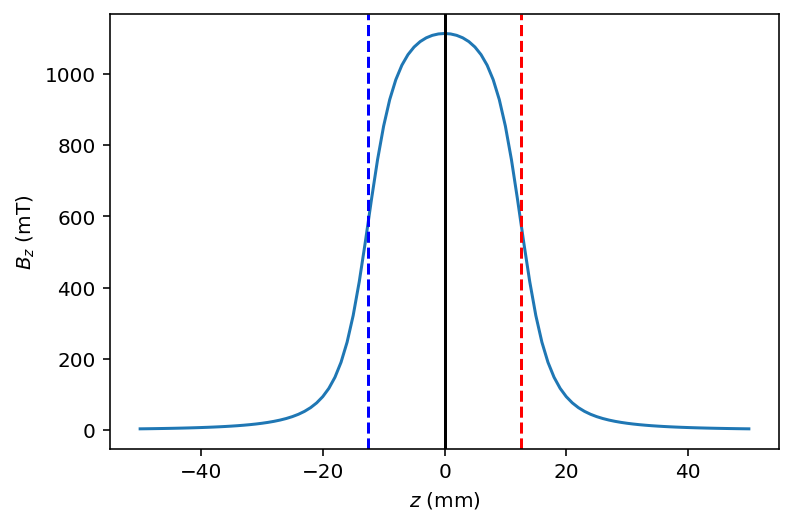

In [2]:
R = 5e-3
L = 25e-3
m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.2,
                            center=(0.0, 0.0, 0))

pm.plot.plot_1D_field(m_cyl);

In [3]:
pm.magnets.Prism()

Prism
J: [0. 0. 1.] (T)
Size: [0.01 0.02 0.03] (m)
Center [0. 0. 0.] (m)

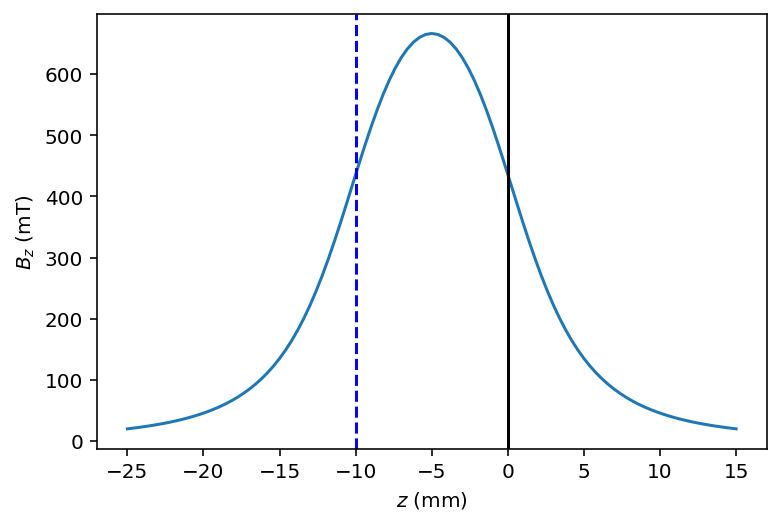

In [4]:
width = 10.0e-3
m_cube = pm.magnets.Cube(width= width, Jr = 1.0,
                            center=(0.0, 0.0, -width/2))

pm.plot.plot_1D_field(m_cube);

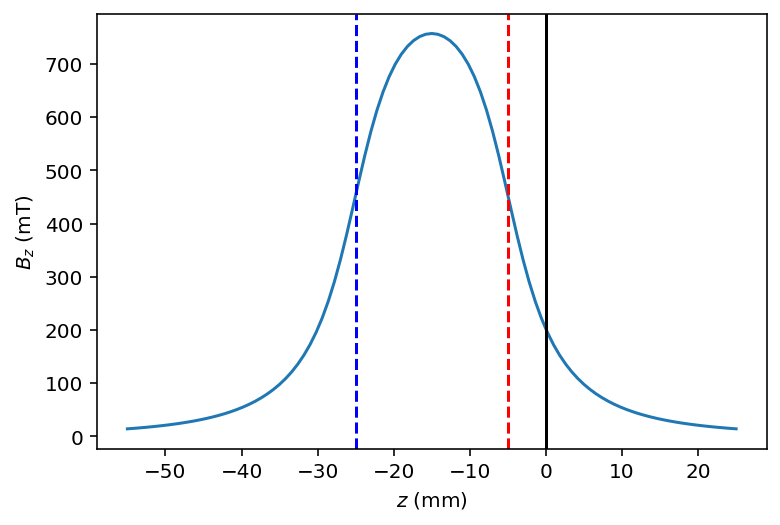

In [5]:
a = 10.0e-3
b = 2*a
c = 3*a
m_quad = pm.magnets.Prism(width= a, height = b, depth=c, Jr = 1.0,
                            center=(0.0, 0.0, -c/2))

pm.plot.plot_1D_field(m_quad);

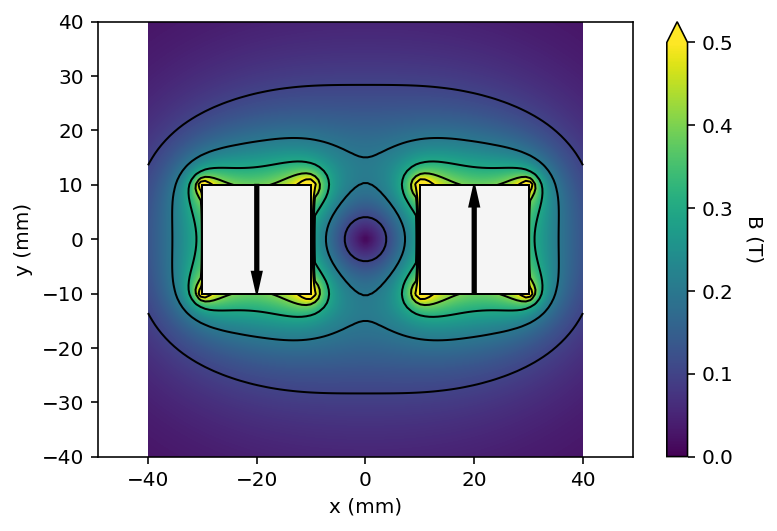

In [6]:
pm.reset_magnets();
cmap = 'viridis'

width = 20e-3
height = 20e-3
hgap_x = width/2
hgap_y = height/2

center = (-width/2 - hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                              Jr = -1.0, center=center, theta = 90.0)
center = (width/2 + hgap_x, 0)
_ = pm.magnets.Rectangle(width = width, height = height,
                               Jr = 1.0, center=center, theta = 90.0)

x, y = pm.grid2D(2*width, 2*height)
B = pm.B_calc_2D(x, y)

pm.plot.plot_2D_contour(x, y, B, UL=.5, NL=6, cmap=cmap)

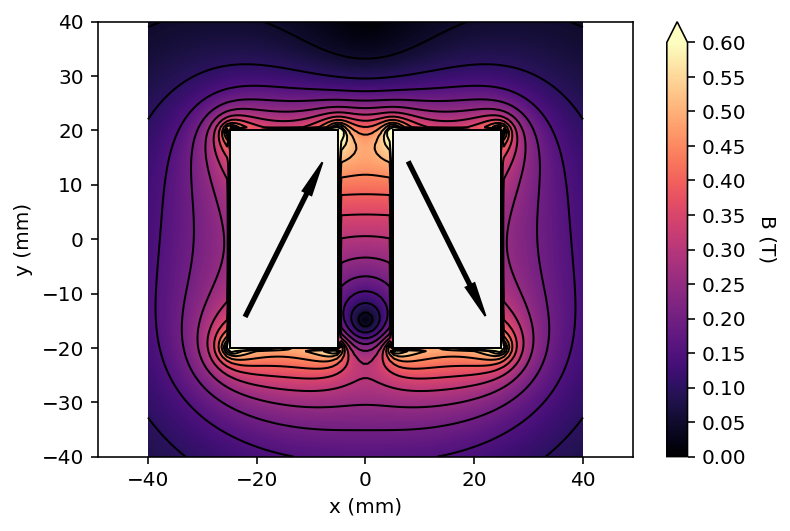

In [7]:
pm.reset_magnets();
width = 20e-3
height = 40e-3
center = (-0.75*width, 0)
m_rec1 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, theta = 45.0)
center = (0.75*width, 0)
m_rec2 = pm.magnets.Rectangle(width = width, height = height, Jr = 1.0, center=center, theta = -45.0)
# m_cube = pm.magnets.Square(width = a,  Jr = 1.0, center=(0, b), theta = 90.0)


x, y = pm.grid2D(2*width, height)
B = pm.B_calc_2D(x, y)

pm.plot.plot_2D_contour(x, y, B, UL=.6, NL=13)

xy


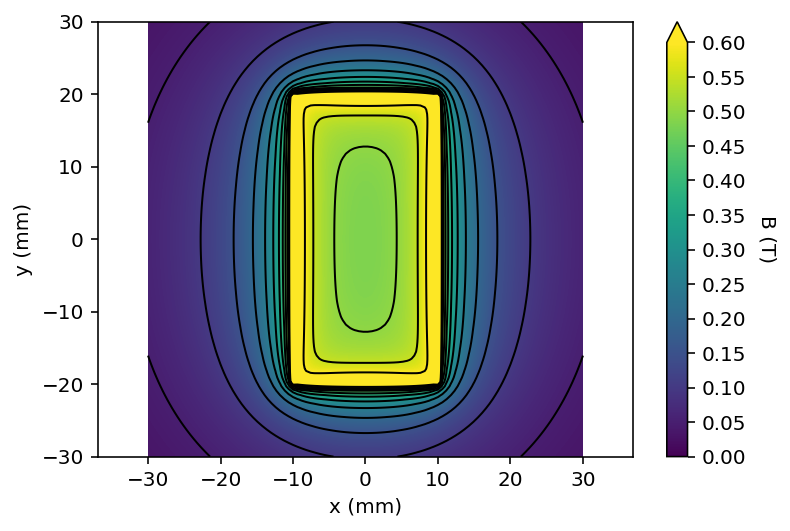

In [8]:
pm.reset_magnets()
a = 20e-3
b = 40e-3
c = 60e-3
center = (0, 0, 0)

# magnetised in x: 
# theta, phi = 0.0, 90.0

# magnetised in y: 
# theta, phi = 90.0, 90.0


# magnetised in z: 
theta, phi = 90.0, 0.0
# or
# theta, phi= 0.0, 0.0
cmap = 'viridis'

magnet = pm.magnets.Prism(width = a, depth = b, height = c, Jr = 1.0, center=center, theta = theta, phi = phi)
x, y = pm.grid2D(c/2, c/2)
z = (c/2)*1.001

B = pm.B_calc_3D(x, y, z)

pm.plot.plot_3D_contour(x, y, z, B, UL=.6, NL=13, cmap = cmap)

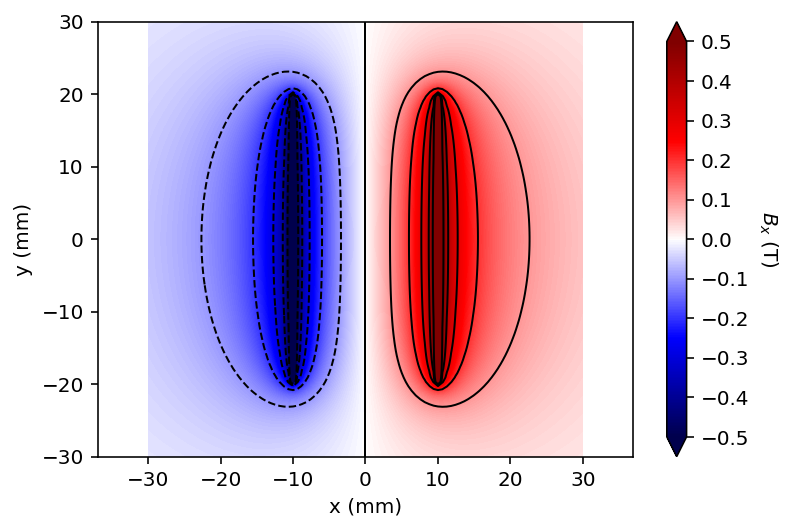

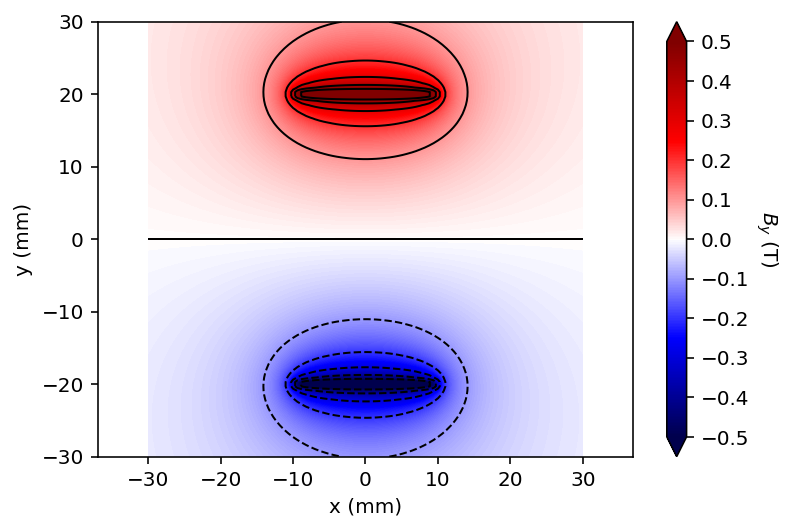

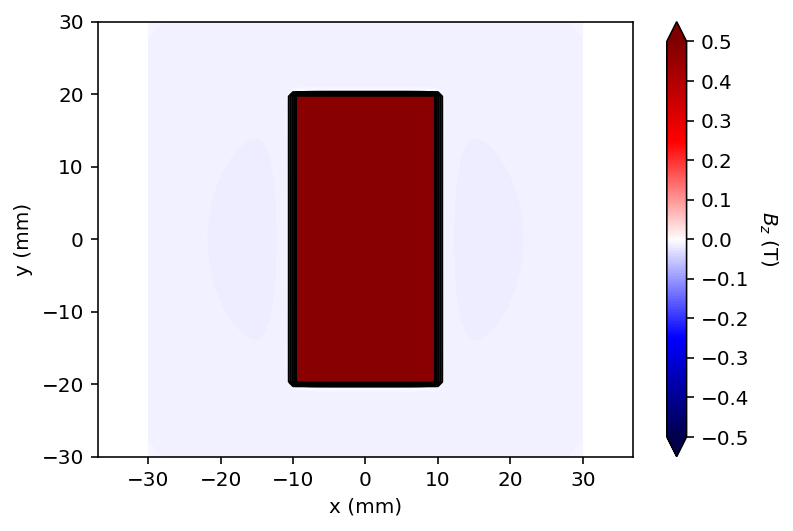

In [9]:
plot_x, plot_y = x*1e3, y*1e3
xlab = f'x (mm)'
ylab = 'y (mm)'

plot_B = B.x
clab = r'$B_x$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = B.y
clab = r'$B_y$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

plot_B = B.z
clab = r'$B_z$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab, clab=clab)

/Users/peter/opt/miniconda3/lib/python3.8/site-packages/pymagnet/magnets/_magnet3.py:157: RuntimeWarning: divide by zero encountered in true_divide
  ((y + b) * (z + c)) /
/Users/peter/opt/miniconda3/lib/python3.8/site-packages/pymagnet/magnets/_magnet3.py:157: RuntimeWarning: invalid value encountered in true_divide
  ((y + b) * (z + c)) /
/Users/peter/opt/miniconda3/lib/python3.8/site-packages/pymagnet/magnets/_magnet3.py:185: RuntimeWarning: divide by zero encountered in true_divide
  data = (_np.sqrt(xa_sq + yb_sq + znc_sq) + c - z) / (
/Users/peter/opt/miniconda3/lib/python3.8/site-packages/pymagnet/magnets/_magnet3.py:263: RuntimeWarning: divide by zero encountered in log
  data = _np.log(self._F2(a, c, b, -x, -z, y) *


xz


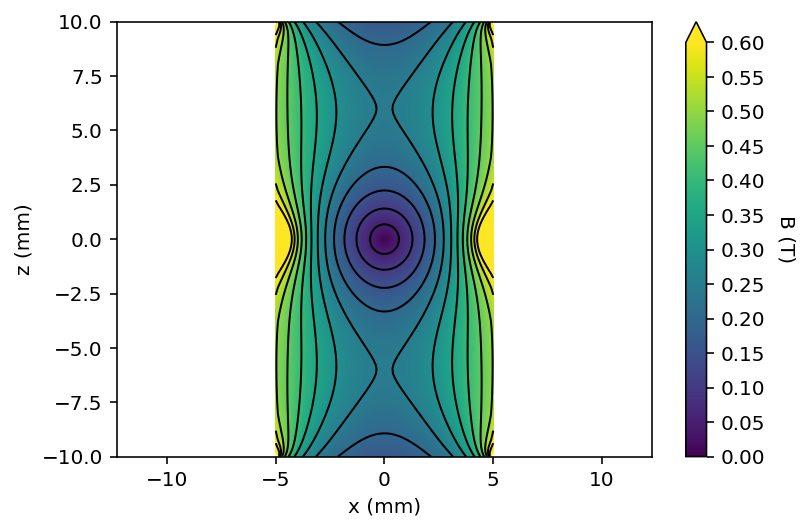

In [10]:
pm.reset_magnets()


a = 10e-3
hGap = a/2
theta, phi = 0.0, 90.0

# Add top left magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(-a/2 - hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom left magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(-a/2 - hGap, 0, -a/2), theta = theta, phi = phi)

# Add top right magnet
_ = pm.magnets.Cube(width = a, Jr = 1.0, center=(a/2 + hGap, 0, a/2), theta = theta, phi = phi)

# Add bottom right magnet
_ = pm.magnets.Cube(width = a, Jr = -1.0, center=(a/2 + hGap, 0, -a/2), theta = theta, phi = phi)


x, z = pm.grid2D(hGap, a)
y = 0

B = pm.B_calc_3D(x, y, z)

cmap = 'viridis'
pm.plot.plot_3D_contour(x, y, z, B, UL=.6, NL=13, cmap = cmap)

In [11]:
pm.magnets._magnet.Registry.print_instances()

Cube
J: [1. 0. 0.] (T)
Size: [0.01 0.01 0.01] (m)
Center [-0.01   0.     0.005] (m)

Cube
J: [1. 0. 0.] (T)
Size: [0.01 0.01 0.01] (m)
Center [0.01  0.    0.005] (m)

Cube
J: [-1. -0. -0.] (T)
Size: [0.01 0.01 0.01] (m)
Center [-0.01   0.    -0.005] (m)

Cube
J: [-1. -0. -0.] (T)
Size: [0.01 0.01 0.01] (m)
Center [ 0.01   0.    -0.005] (m)



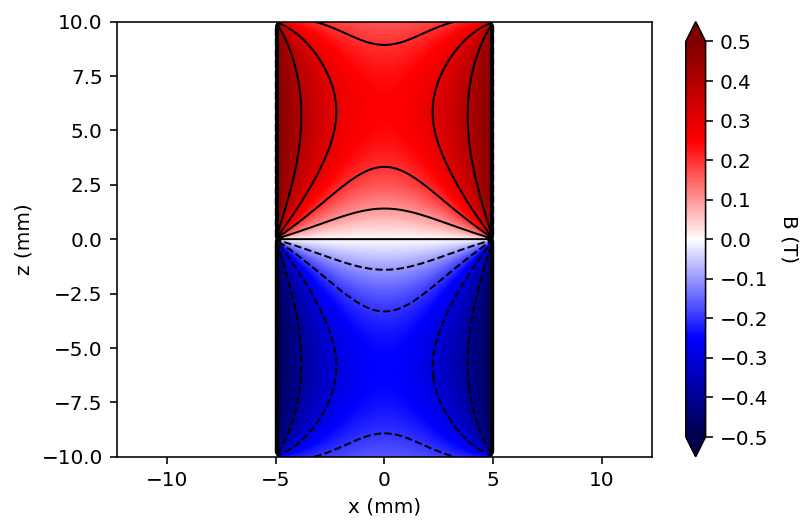

/Users/peter/opt/miniconda3/lib/python3.8/site-packages/pymagnet/plot.py:398: UserWarning: No contour levels were found within the data range.
  _ = _plt.contour(plot_x, plot_y, plot_B,


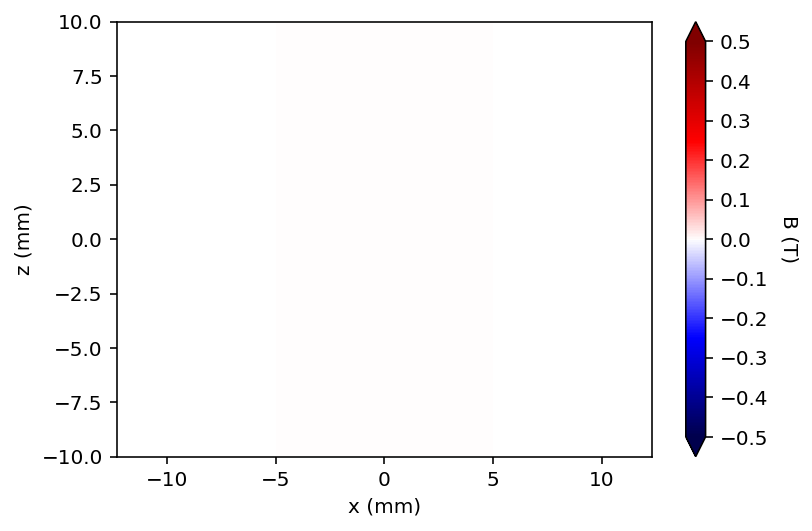

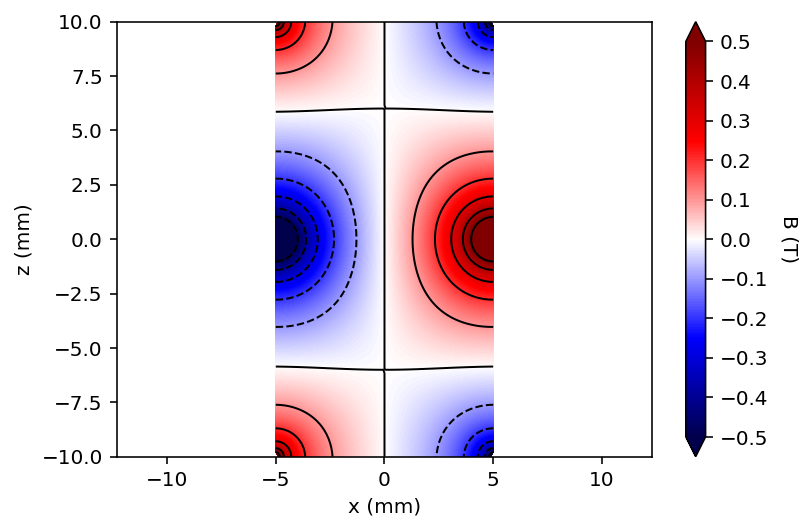

In [12]:
plot_x, plot_y = x*1e3, z*1e3
xlab = f'x (mm)'
ylab = 'z (mm)'

plot_B = B.x
clab = r'$B_x$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

plot_B = B.y
clab = r'$B_y$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

plot_B = B.z
clab = r'$B_z$ (T)'
pm.plot.plot_sub_contour_3D(plot_x, plot_y, plot_B, xlab=xlab, ylab=ylab)

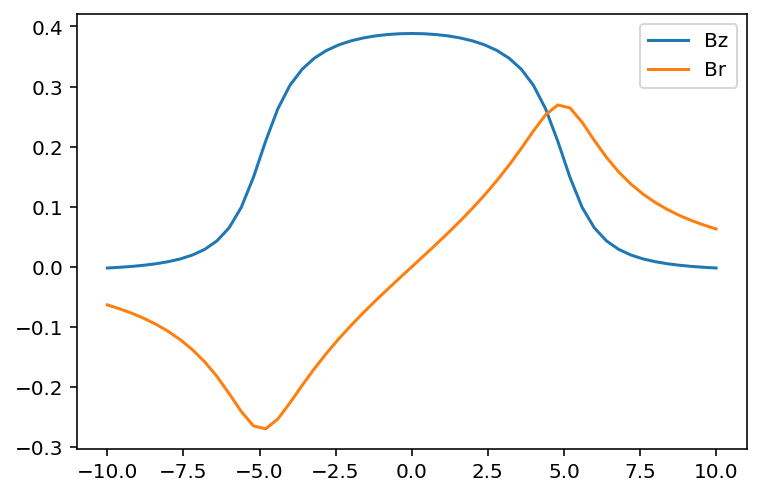

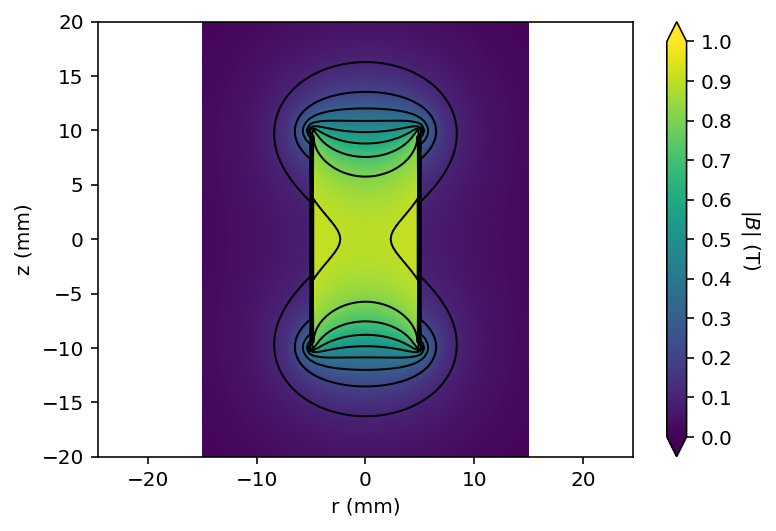

In [13]:
R = 5e-3
L = 20e-3

m_cyl = pm.magnets.Cylinder(radius = R, length = L, Jr = 1.0,
                            center=(0.0, 0.0, 0))

pm.plot.line_plot_cylinder(m_cyl)

pm.plot.contour_plot_cylinder(m_cyl)